Reviewing homework 5:
- it is not actually possible to simulate a photon's path to escape the sun. like no computer on earth can do that many scatters.
- this is useful though because in research you have to figure out yourself if something is possible or not
- for sampling in the sphere, if you are sampling both theta and phi, the likely theta angles from 0 to pi change as you get closer to the poles
- could speed up the code a bit realizing that the mean free path changes very slowly, so could just re-estimate every million or so scatters
- could vectorize it then since the mean free path is not changing so each step isn't dependent on the one before that
- so this problem is actually better to solve with the diffusion equation and not monte carlo
- before getting too far into final project, try to estimate how long it will take to do the relevant computations 

Continuing ODEs:
- sometimes have functions where things are changing really quickly in some areas and not in other areas
- makes sense to use a variable step size then
- ideally the error in each step size would be about equal, rather than the step sizes being equal
- with a fourth order accurate scheme, error goes as h^5, so when the step size is doubled, the error should be multiplied by 32 (2^5)
- then can calculate the error difference between the larger and smaller step size and can use that to solve for what the step size should be based on the target tolerance - see slides for formula and algorithm steps
- if the two points that you are checking are actually very close to each other, the recommended step size will be nearly infinite, so need to set an upper bound on how large h can get like not letting it increase by more than a factor of two between steps
- gets more complicated with multiple equations - see slides
- this would have been useful for the pendulum problem from last week

Other methods:
- these are all similar concepts to Euler's method involving Taylor expansions but there are some modifications, and they are good in different scenarios
- Leapfrog Method
    - making estimates at one step, then go back to the midpoint, then forward to the next midpoint, then back to the other point
    - see slides for nice illustration in comparison to RK2
    - can be extended to higher order derivatives and multiple equations just like RK
    - this is useful because it is symmetric, so if time is reversed you will get back to the same value to a rounding error
    - useful when energy conservation is important in a periodic system
    - energy still varies, but if you go a full period you end up back with the same energy, so this prevents drift over many periods
- Verlet Method
    - a leapfrog based simplification of equations of motion in the form d^2x/dt^2=f(x,t)
    - this works as long as force does not depend on velocity
    - basically calculating x on the main time steps and v on the half time steps
    - need to do some extra calculations to get x and v at the same time step
    - can extended it to multiple spatial dimensions

In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
def f(r,t): #where r is the vector (x,y,vx,vy)
    x=r[0]
    y=r[1]
    vx=r[2]
    vy=r[3]
    R=(x**2+y**2)**0.5
    return np.array([vx,vy,-G*M*x/(R**3),-G*M*y/(R**3)],float)

In [105]:
G=6.6738e-11
M=1.9891e30
x0=-1.471e11
y0=0
vx0=0
vy0=3.0287e4 
h=60*60*24 #1hr in seconds
YR=3.154e7 #approximate seconds in a year
Ts=np.arange(0,3*YR,h)

In [107]:
#create arrays for Xs and Vs
Rs=np.zeros((Ts.size,4))
Rs[0,0]=x0
Rs[0,1]=y0
Rs[0,2]=vx0
Rs[0,3]=vy0

In [127]:
#doing RK4 method first
for i, t in enumerate(Ts[1:],start=1): #start at second point
    k1=h*f(Rs[i-1],t)
    k2=h*f(Rs[i-1]+0.5*k1,t+0.5*h)
    k3=h*f(Rs[i-1]+0.5*k2,t+0.5*h)
    k4=h*f(Rs[i-1]+k3,t+h)
    Rs[i]=Rs[i-1]+(1/6)*(k1+2*k2+2*k3+k4) 

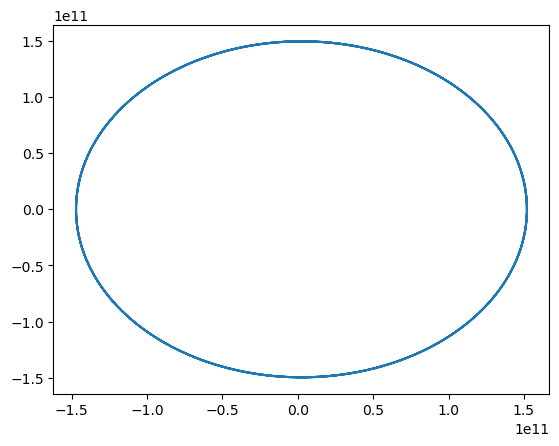

In [129]:
plt.plot(Rs[:,0],Rs[:,1])